3.1. Print 5 nodes with maximum degree centrality, vizualize your graph with color or size as the function of degree <br>\n",
    "3.2. Print 5 nodes with maximum betweenness centrality, vizualize your graph with color or size as the function of degree <br>\n",
    "3.3. Print 5 nodes with maximum eigenvector centrality, vizualize your graph with color or size as the function of degree <br>\n",
    "3.4 Print histogram with centralities distribution of your graph

# Import fuction

In [22]:
import pandas as pd
import urllib
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import networkx as nx
G=nx.read_edgelist('facebook_combined.txt',nodetype=int,create_using=nx.DiGraph())


import warnings; warnings.simplefilter('ignore')

# Reading Data


### Source - Publicly available data at http://snap.stanford.edu/data/ego-Facebook.html, which provides information about people and their friends. The data is anonymized.

In [ ]:
f = pd.read_csv(".//facebook_combined.txt", sep="\t")

In [2]:
with open('facebook_combined.txt') as f:
    content = f.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
content = [ [ int(x.strip().split()[0]), int(x.strip().split()[1])]for x in content]

In [3]:
graph = nx.Graph()

for node in content:
    graph.add_edge(node[0],  node[1])

In [4]:
# Gut check to see if we are working with the same data as the source
print(nx.info(graph))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


# Visualization

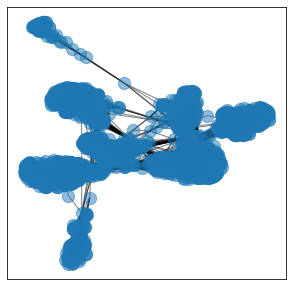

In [5]:
plt.figure(figsize=(5,5))
nx.draw_networkx(graph,
    with_labels=False,
    node_size=150,
    alpha=0.5);

# Degree centrality

In [6]:
G = nx.read_adjlist('facebook_combined.txt')
coord = nx.spring_layout(G, k = 0.15)


In [7]:
Gc = max(nx.connected_component_subgraphs(G), key=len)
print("Number of nodes -", len(Gc.nodes()))
print("Number of edges -", len(Gc.edges()))

Number of nodes - 4039
Number of edges - 88234


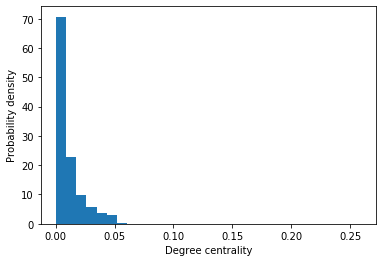

In [8]:
degree_centralities = nx.degree_centrality(graph)
degree_centralities_array = []
for key, value in degree_centralities.items():
    degree_centralities_array.append([key,value])
degree_centralities_array = np.array(degree_centralities_array)

plt.hist(degree_centralities_array[:,1], bins=30, density=True);
plt.xlabel("Degree centrality");
plt.ylabel("Probability density");

In [9]:
dict1=G.degree()
print("The node with maximum degree is :")
i = max(nx.degree_centrality(G),key=(nx.degree_centrality(G)).get)

val=dict1[i]
for p,r in dict1:
    if (r==val):
        print (str(p),str(r))

print("\n")   
print("Node    Degree Centrality")

dict_sorted_keys = sorted(nx.degree_centrality(G), key=(nx.degree_centrality(G)).get, reverse=True)
w=1
for r in dict_sorted_keys:
    if(w <= 5):
        w=w+1
        print(str(r)+"\t"+str(dict1[r]))

The node with maximum degree is :
107 1045


Node    Degree Centrality
107	1045
1684	792
1912	755
3437	547
0	347


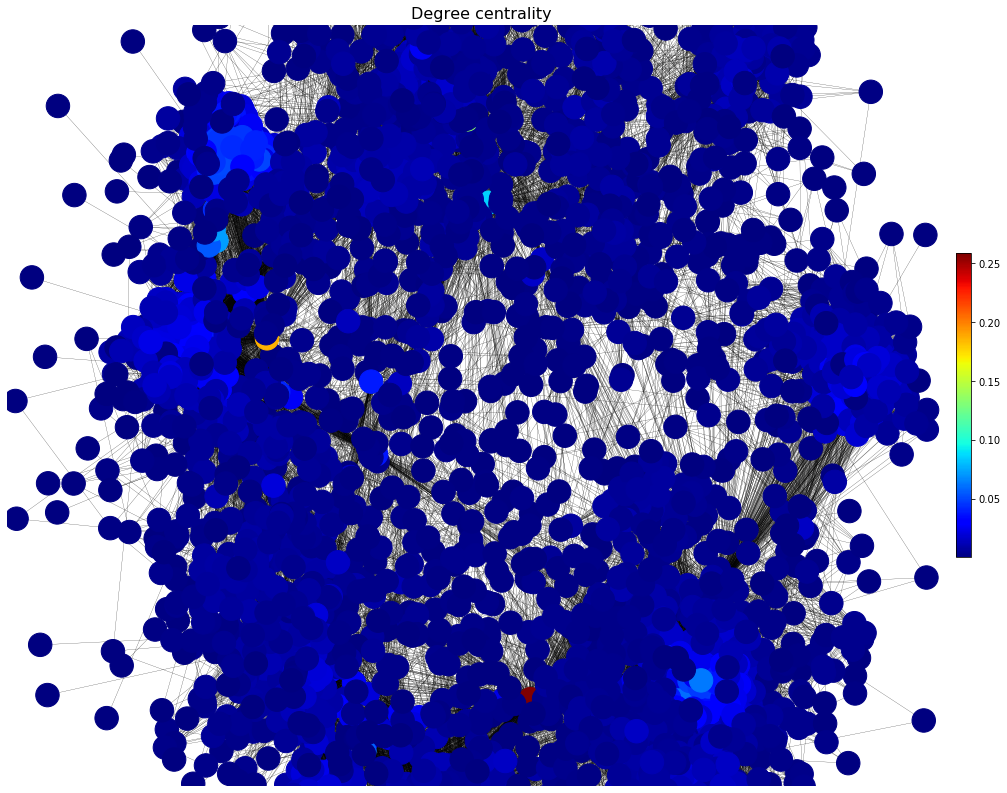

In [10]:
plt.figure(figsize=(20,14))
degree_centr = nx.degree_centrality(Gc)
node_colors = list(degree_centr.values())

nodes = nx.draw_networkx_nodes(Gc, pos = coord, 
                               node_color=node_colors,
                               node_size = 550,
                               nodelist=list(degree_centr.keys()),
                               cmap = 'jet',
                               with_labels = False)
edges = nx.draw_networkx_edges(Gc, pos = coord, width = .2)
plt.xlim([-.95, .9])
plt.ylim([-.5, .6])
plt.colorbar(nodes, shrink=.4, pad=.0005, aspect=20)
plt.title('Degree centrality', fontsize = 16)
plt.axis("off")

top_nodes = sorted(degree_centr, key = degree_centr.get)[:5]

# Between centrality

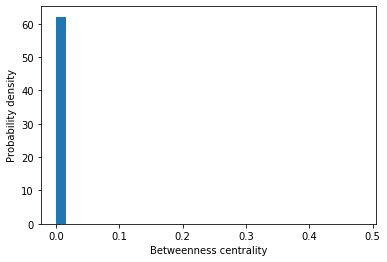

In [11]:
betweenness_centralities = nx.betweenness_centrality(graph)
betweenness_centralities_array = []
for key, value in betweenness_centralities.items():
    betweenness_centralities_array.append([key,value])
betweenness_centralities_array = np.array(betweenness_centralities_array)

plt.hist(betweenness_centralities_array[:,1], bins=30, density=True);
plt.xlabel("Betweenness centrality");
plt.ylabel("Probability density");

In [12]:
dict =nx.betweenness_centrality(G)
i= max(nx.betweenness_centrality(G),key=(nx.betweenness_centrality(G)).get)
print("Node with maximum Betweenness Centrality : ")
print(i,dict[i])

print("\n")
print("Node    Betweenness Centrality")

dict_sorted_keys = sorted(dict, key=dict.get, reverse=True)
w=1
for r in dict_sorted_keys:
    if(w<=5):
        w=w+1
        print (str(r)+"\t"+str(dict[r]))

Node with maximum Betweenness Centrality : 
107 0.4805180785560152


Node    Betweenness Centrality
107	0.4805180785560152
1684	0.3377974497301992
3437	0.23611535735892905
1912	0.2292953395868782
1085	0.14901509211665306


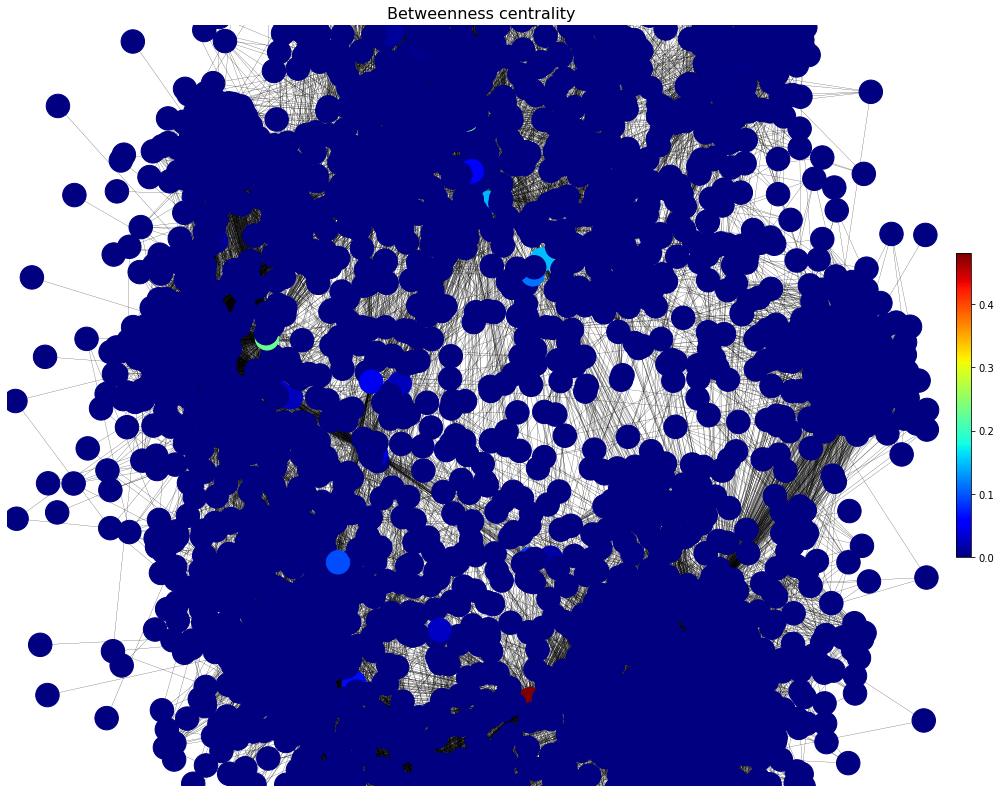

In [13]:
plt.figure(figsize=(20,14))
between_centr = nx.betweenness_centrality(Gc)
node_colors = list(between_centr.values())

nodes = nx.draw_networkx_nodes(Gc, pos = coord, 
                               node_color=node_colors,
                               node_size = 550,
                               nodelist=list(between_centr.keys()),
                               cmap = 'jet',
                               with_labels = False
                               )
edges = nx.draw_networkx_edges(Gc, pos = coord, width = .2)
plt.xlim([-.95, .9])
plt.ylim([-.5, .6])
plt.colorbar(nodes, shrink=.4, pad=.0005, aspect=20)
plt.title('Betweenness centrality', fontsize = 16)
plt.axis("off")

top_nodes = sorted(between_centr, key = between_centr.get)[:5]

# Eigenvector centrality

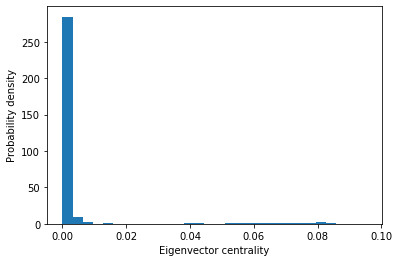

In [14]:
eigenvector_centralities = nx.eigenvector_centrality(graph)
eigenvector_centralities_array = []
for key, value in eigenvector_centralities.items():
    eigenvector_centralities_array.append([key,value])
eigenvector_centralities_array = np.array(eigenvector_centralities_array)

plt.hist(eigenvector_centralities_array[:,1], bins=30, density=True);
plt.xlabel("Eigenvector centrality");
plt.ylabel("Probability density");

In [15]:

dict =nx.eigenvector_centrality(G, max_iter = 10000)
i= max(nx.eigenvector_centrality(G, max_iter = 10000),key=(nx.eigenvector_centrality(G, max_iter = 10000)).get)
print("Node with maximum Eigenvector Centrality : ")
print(i,dict[i])

print("\n")
print("Node    Eigenvector Centrality")

dict_sorted_keys = sorted(dict, key=dict.get, reverse=True)
w=1
for r in dict_sorted_keys:
    if(w<=5):
        w=w+1
        print (str(r)+"\t"+str(dict[r]))

Node with maximum Eigenvector Centrality : 
1912 0.09540696149067629


Node    Eigenvector Centrality
1912	0.09540696149067629
2266	0.08698327767886553
2206	0.08605239270584343
2233	0.08517340912756598
2464	0.08427877475676092


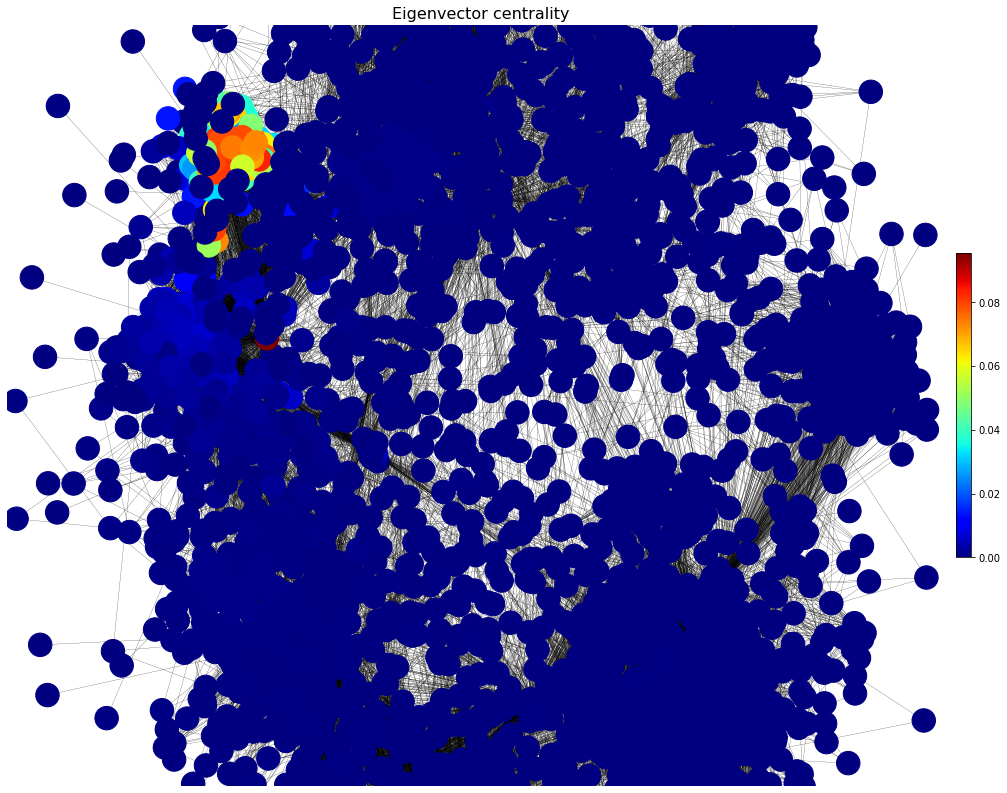

In [16]:
plt.figure(figsize=(20,14))
eigenvector_centr = nx.eigenvector_centrality(Gc)
node_colors = list(eigenvector_centr.values())

nodes = nx.draw_networkx_nodes(Gc, pos = coord, 
                               node_color=node_colors,
                               node_size = 550,
                               nodelist=list(eigenvector_centr.keys()),
                               cmap = 'jet',
                               with_labels = False)
edges = nx.draw_networkx_edges(Gc, pos = coord, width = .2)
plt.xlim([-.95, .9])
plt.ylim([-.5, .6])
plt.colorbar(nodes, shrink=.4, pad=.0005, aspect=20)
plt.title('Eigenvector centrality', fontsize = 16)
plt.axis("off")

top_nodes = sorted(eigenvector_centr, key = eigenvector_centr.get)[:5]


# Closeness centrality

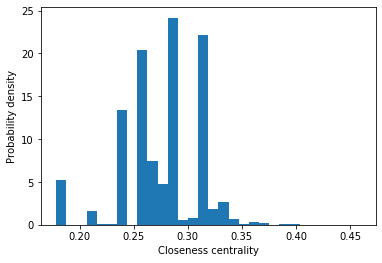

In [17]:
closeness_centralities = nx.closeness_centrality(graph)
closeness_centralities_array = []
for key, value in closeness_centralities.items():
    closeness_centralities_array.append([key,value])
closeness_centralities_array = np.array(closeness_centralities_array)

plt.hist(closeness_centralities_array[:,1], bins=30, density=True);
plt.xlabel("Closeness centrality");
plt.ylabel("Probability density");

In [18]:
dict =nx.closeness_centrality(G)
i= max(nx.closeness_centrality(G),key=(nx.closeness_centrality(G)).get)
print("Node with maximum Closeness Centrality : ")
print(i,dict[i])

print("\n")
print("Node    Closeness Centrality")

dict_sorted_keys = sorted(dict, key=dict.get, reverse=True)
w=1
for r in dict_sorted_keys:
    if(w<=5):
        w=w+1
        print (str(r)+"\t"+str(dict[r]))

Node with maximum Closeness Centrality : 
107 0.45969945355191255


Node    Closeness Centrality
107	0.45969945355191255
58	0.3974018305284913
428	0.3948371956585509
563	0.3939127889961955
1684	0.39360561458231796


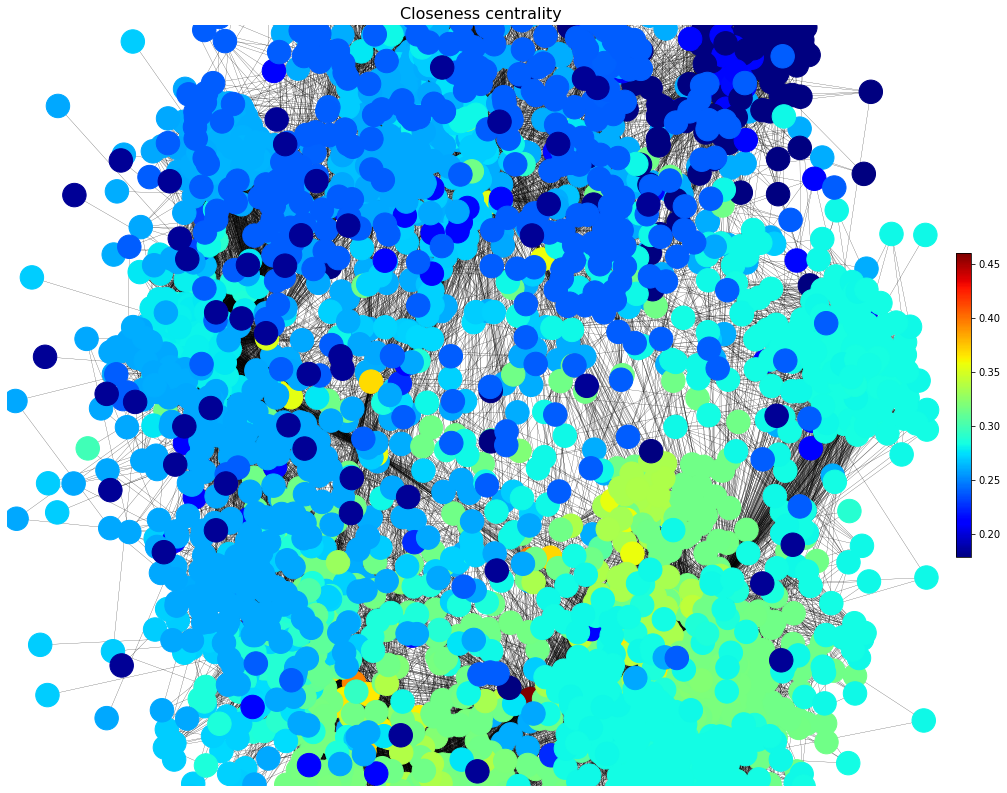

In [19]:
plt.figure(figsize=(20,14))
closeness_centr = nx.closeness_centrality(Gc)
node_colors = list(closeness_centr.values())

nodes = nx.draw_networkx_nodes(Gc, pos = coord, 
                               node_color=node_colors,
                               node_size = 550,
                               nodelist=list(closeness_centr.keys()),
                               cmap = 'jet',
                               with_labels = False
                               )
edges = nx.draw_networkx_edges(Gc, pos = coord, width = .2)
plt.xlim([-.95, .9])
plt.ylim([-.5, .6])
plt.colorbar(nodes, shrink=.4, pad=.0005, aspect=20)
plt.title('Closeness centrality', fontsize = 16)
plt.axis("off")

top_nodes = sorted(closeness_centr, key = closeness_centr.get)[:5]

# Histogram with centralities distribution

In [20]:
# function to create proper histogram in matplotlib:
def plot_hist(data, colormap, alpha, bins = 10, round_value = 1):
    cm = plt.cm.get_cmap(colormap)
    counts, bins, patches = plt.hist(data, alpha = alpha, color = 'Blue', bins = bins)
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    plt.xticks(bins.round(round_value))
    col = bin_centers - min(bin_centers)
    col /= max(col)
    # use various colors for different bins:
    for c, p in zip(col, patches):
        plt.setp(p, 'facecolor', cm(c))
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)

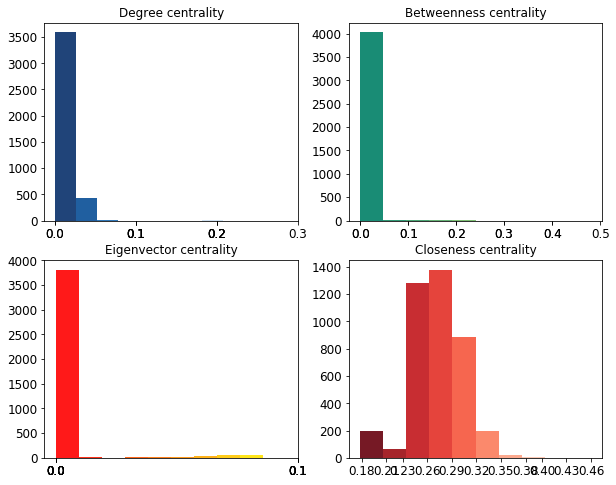

In [21]:
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.title("Degree centrality", y = 1.00)
plot_hist(data = list(degree_centr.values()), colormap = 'Blues_r', alpha = 0.9, bins = 10, round_value=1)

plt.subplot(2, 2, 2)
plt.title("Betweenness centrality", y = 1.00)
plot_hist(data = list(between_centr.values()), colormap = 'summer', alpha = 0.9, bins = 10, round_value=1)

plt.subplot(2, 2, 3)
plt.title("Eigenvector centrality", y = 1.00)
plot_hist(data = list(eigenvector_centr.values()), colormap = 'autumn', alpha = 0.9, bins = 10)

plt.subplot(2, 2, 4)
plt.title("Closeness centrality", y = 1.00)
plot_hist(data = list(closeness_centr.values()), colormap = 'Reds_r', alpha = 0.9, bins = 10, round_value=2)